###Checkpoint 7:
OBJECTIVES:K-means & Hierarchical clustering 

Exercice1: Load your dataset. 

In [1]:
import pandas as pd

data=pd.read_csv('CC GENERAL.csv')

data.head(2)



,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [2]:
del data['CUST_ID']
data.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [3]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
#Data Cleaninig
data=data.dropna(0,'any')
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


Exercice2. Use hierarchical clustering to identify the inherent groupings within your data.
Exercice33. Plot the clusters. 



We consider the Payment variable to be the most important to predict. it determines the turnover generated with each client and therefore the overall turnover.

We therefore decided to perform clusters between it and the other variables and to visualize it. All with a For loop, in order to detect any possible model.

In [5]:
import matplotlib.pyplot as plt
plt.close('all')

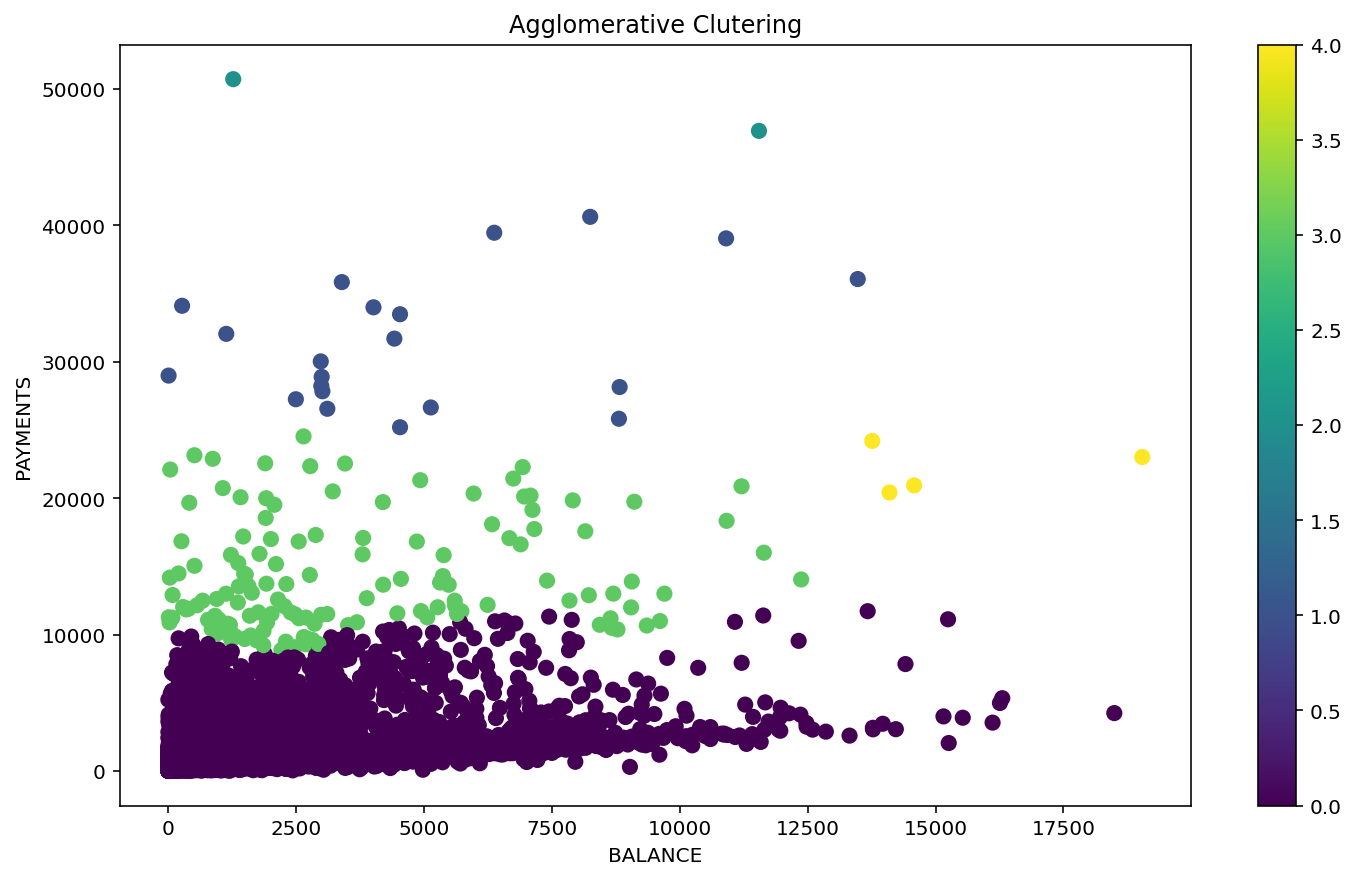

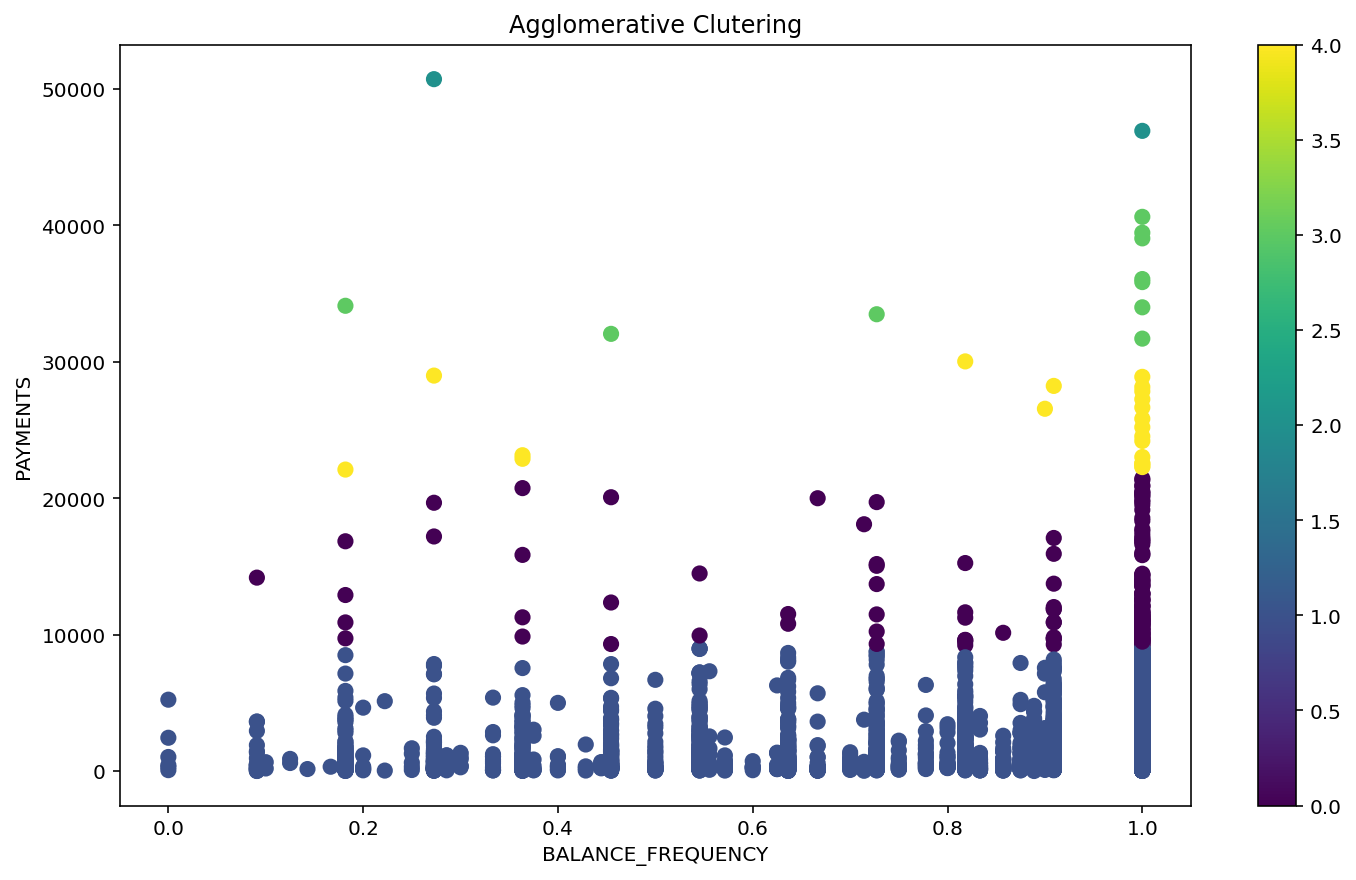

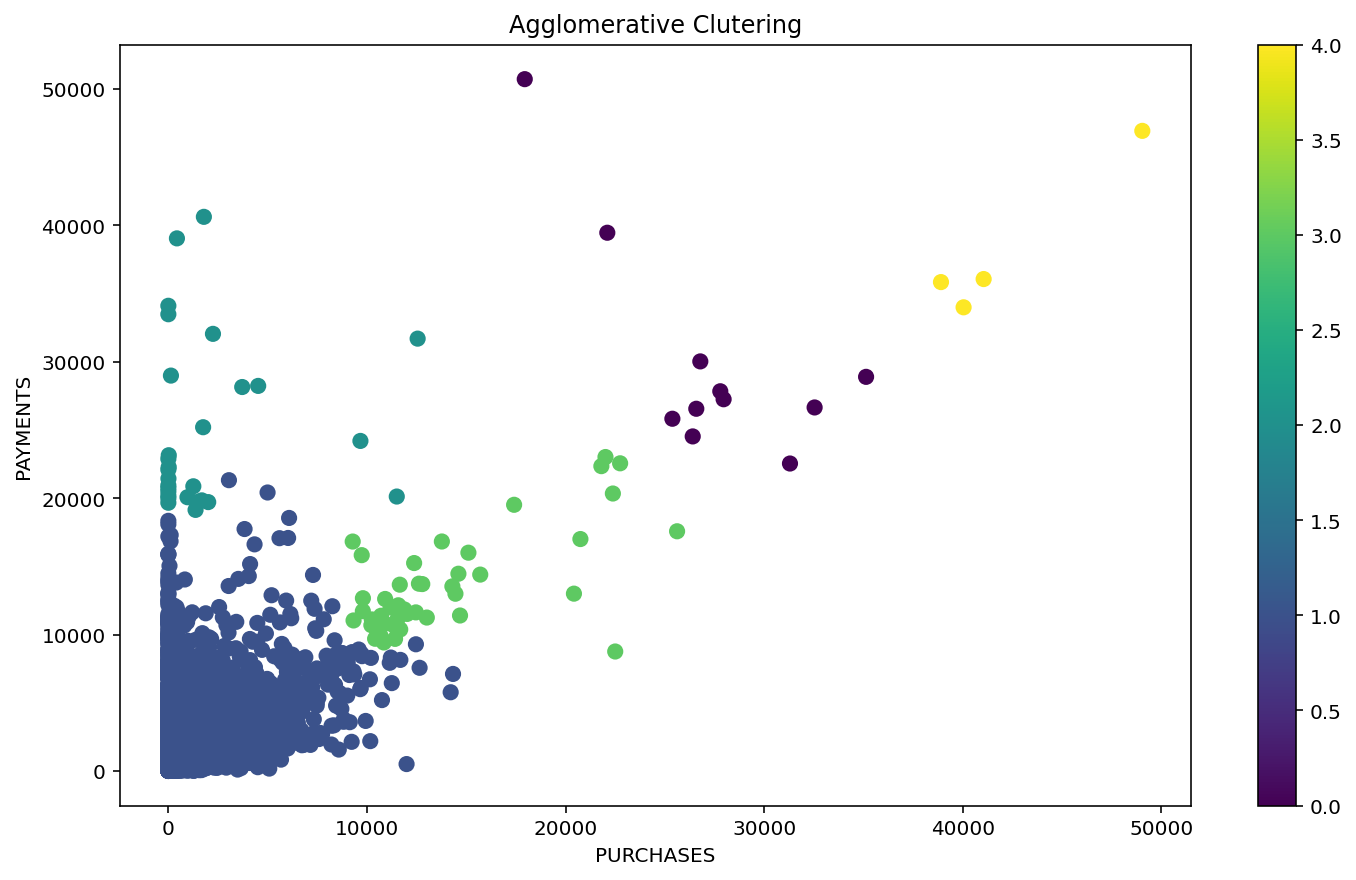

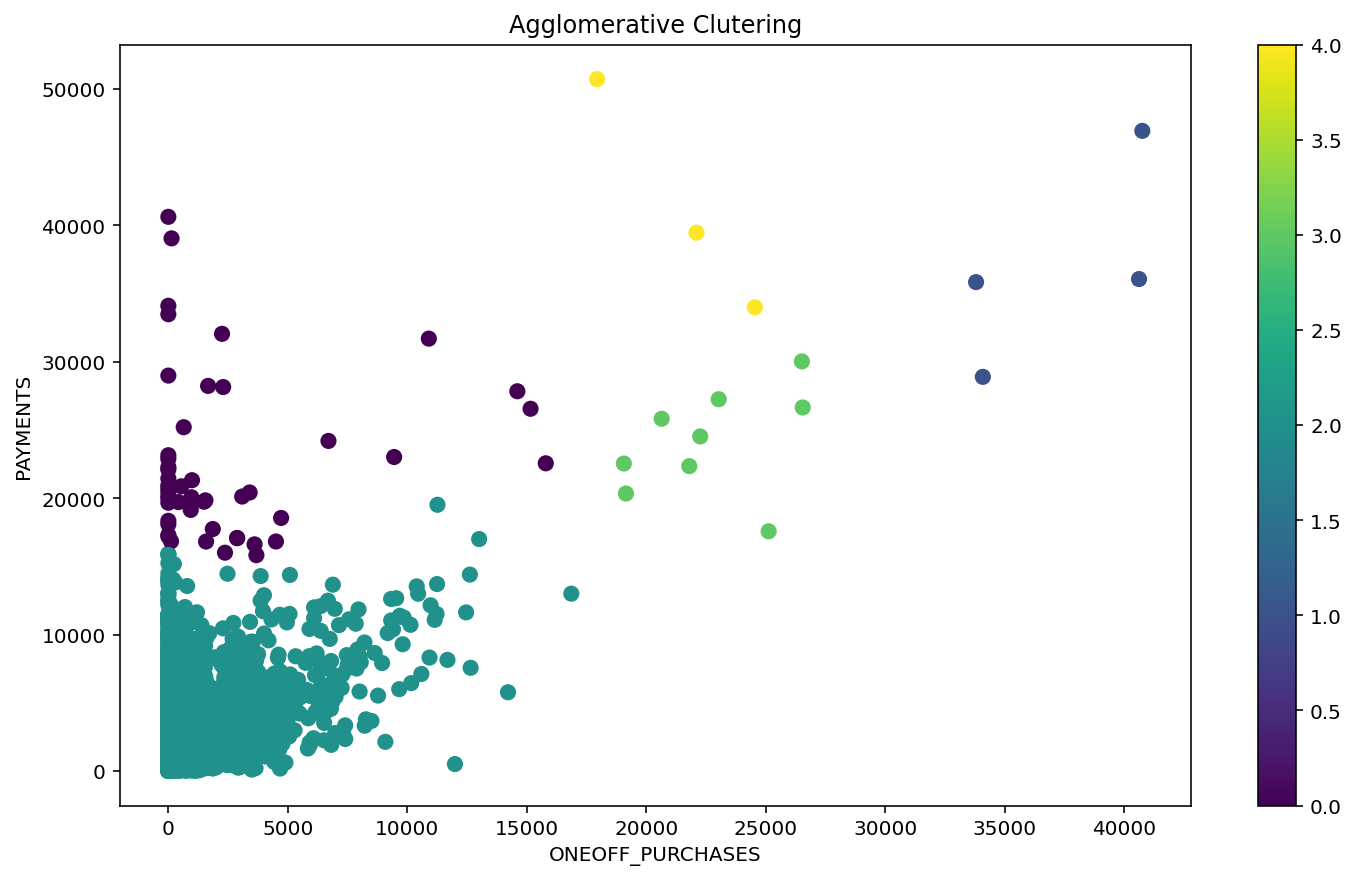

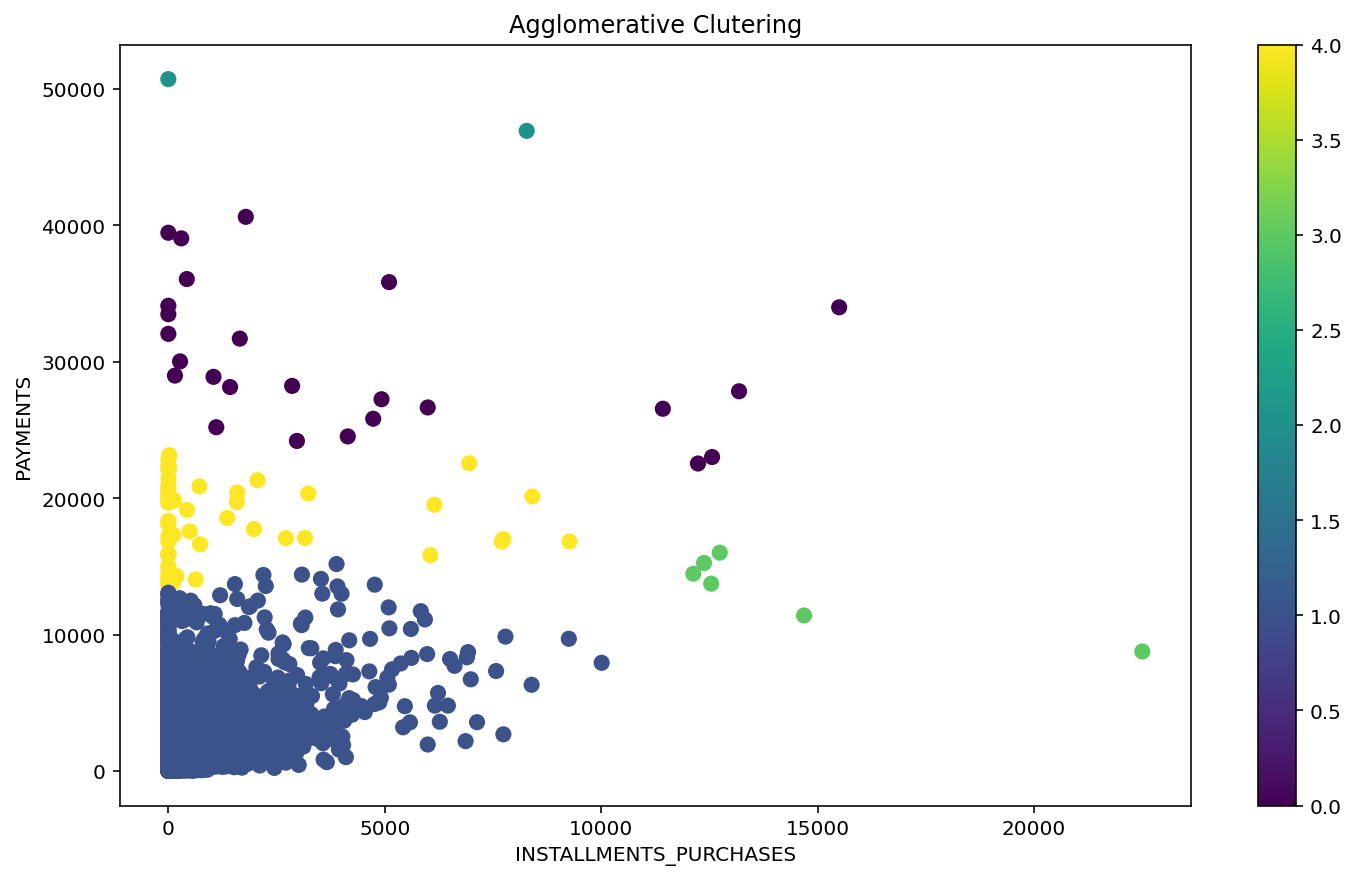

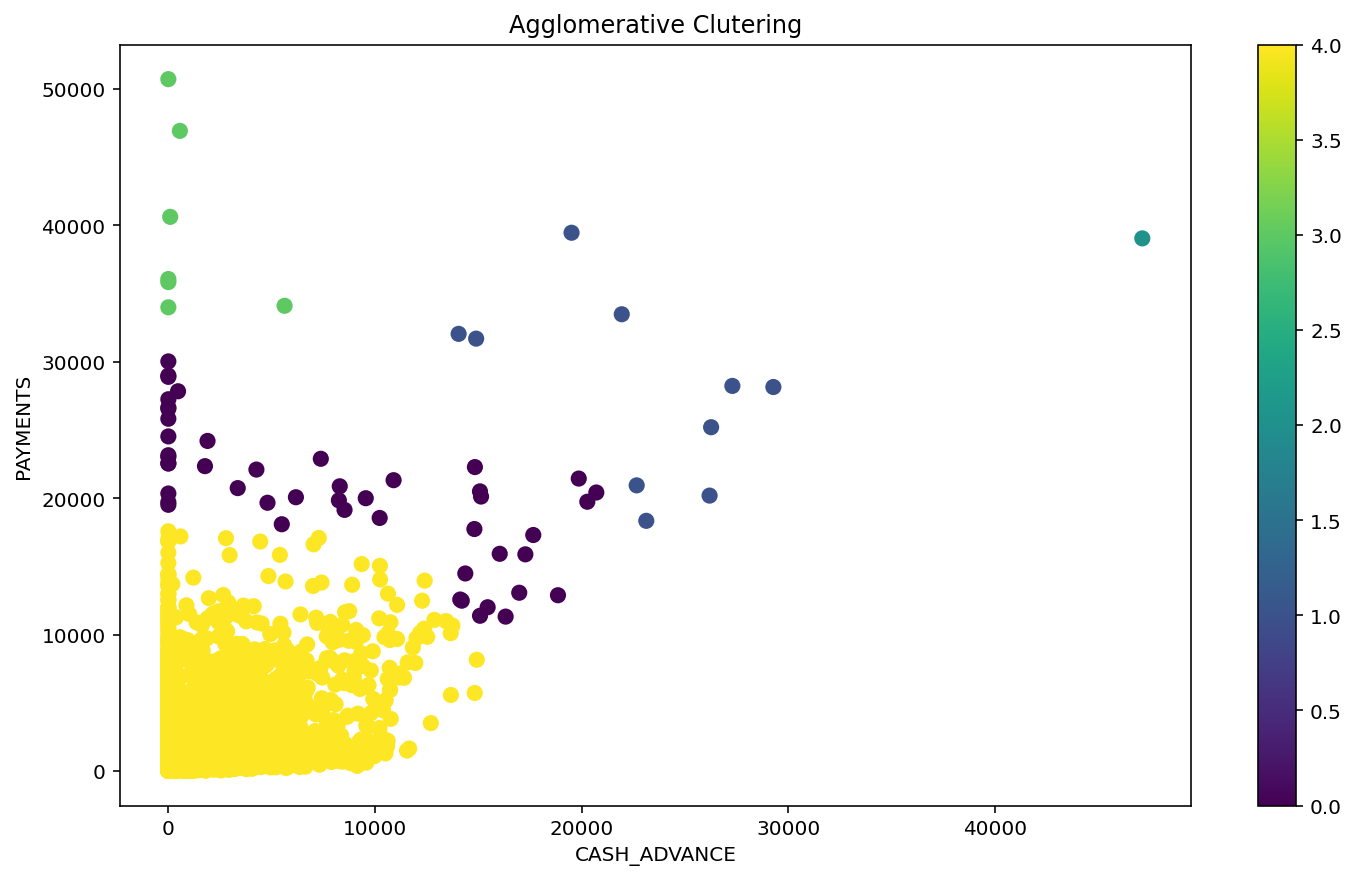

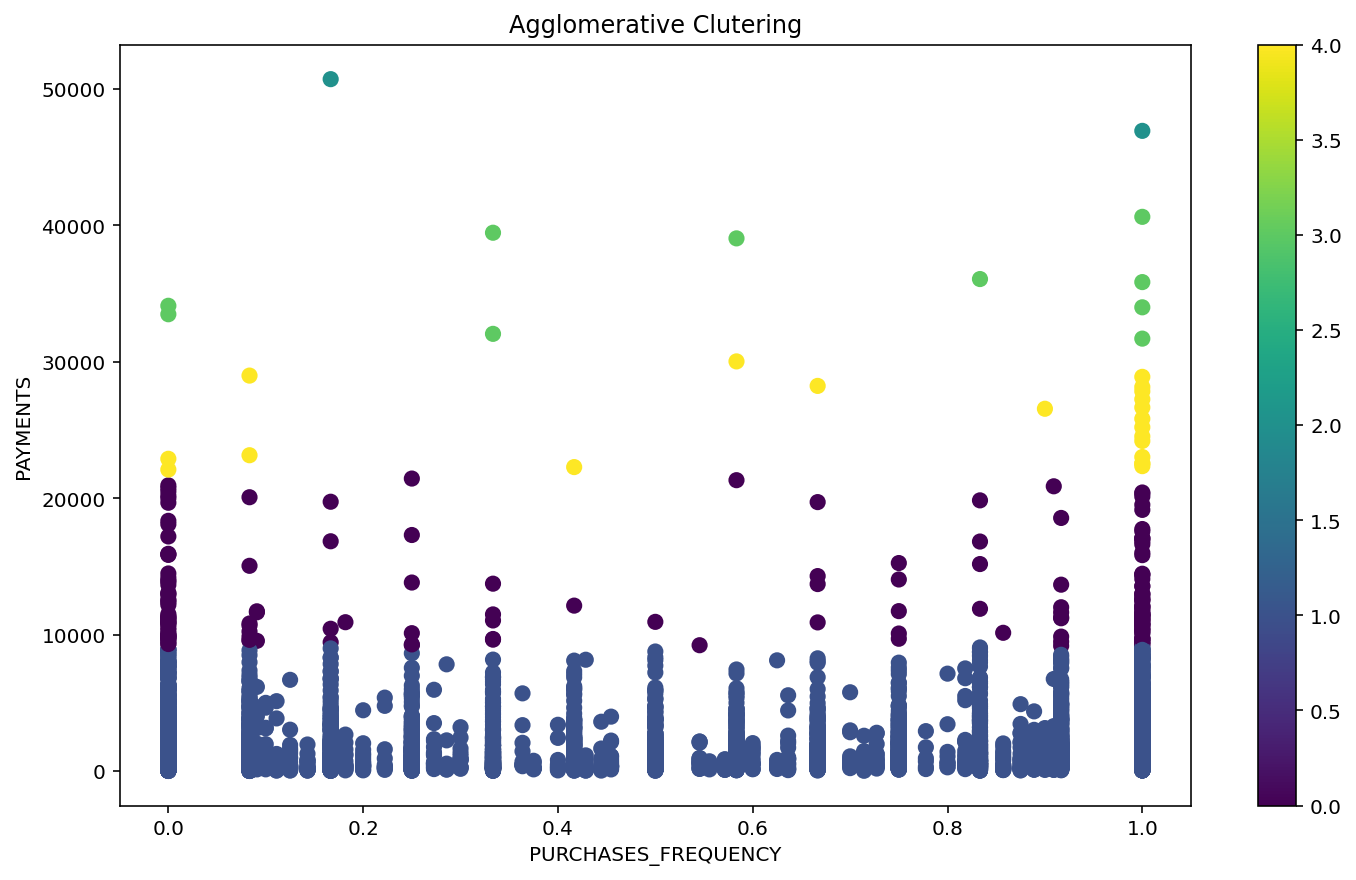

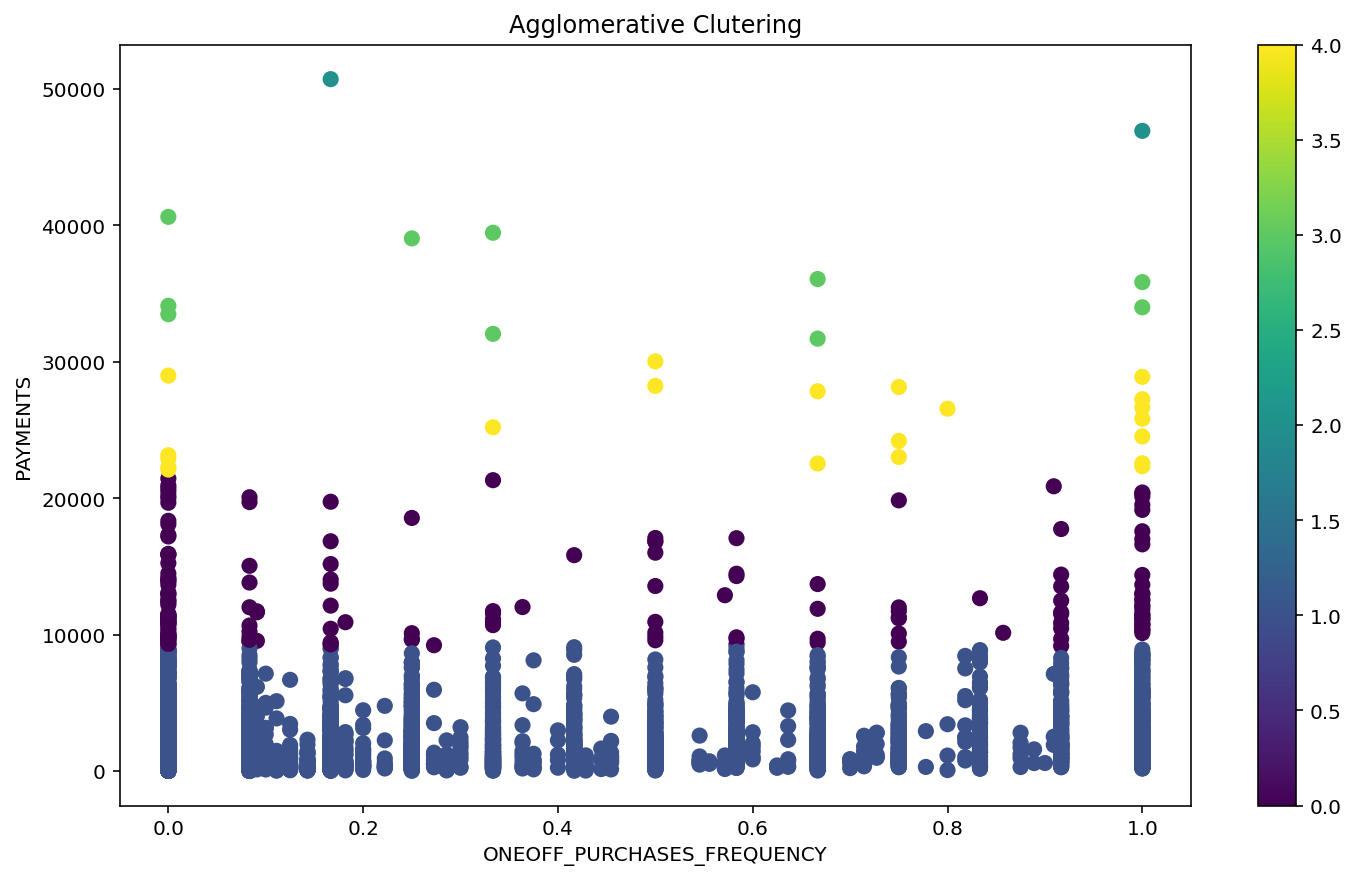

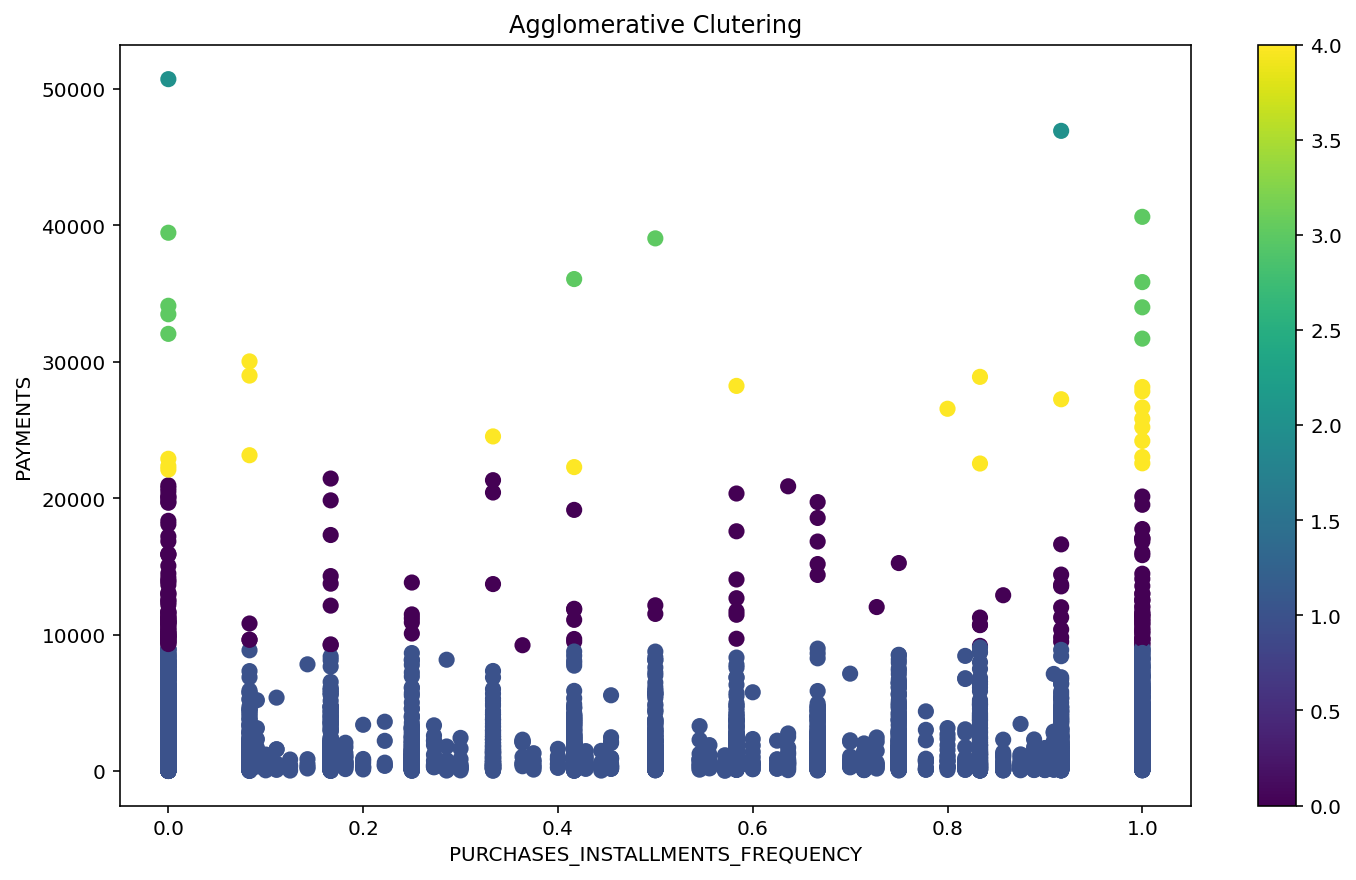

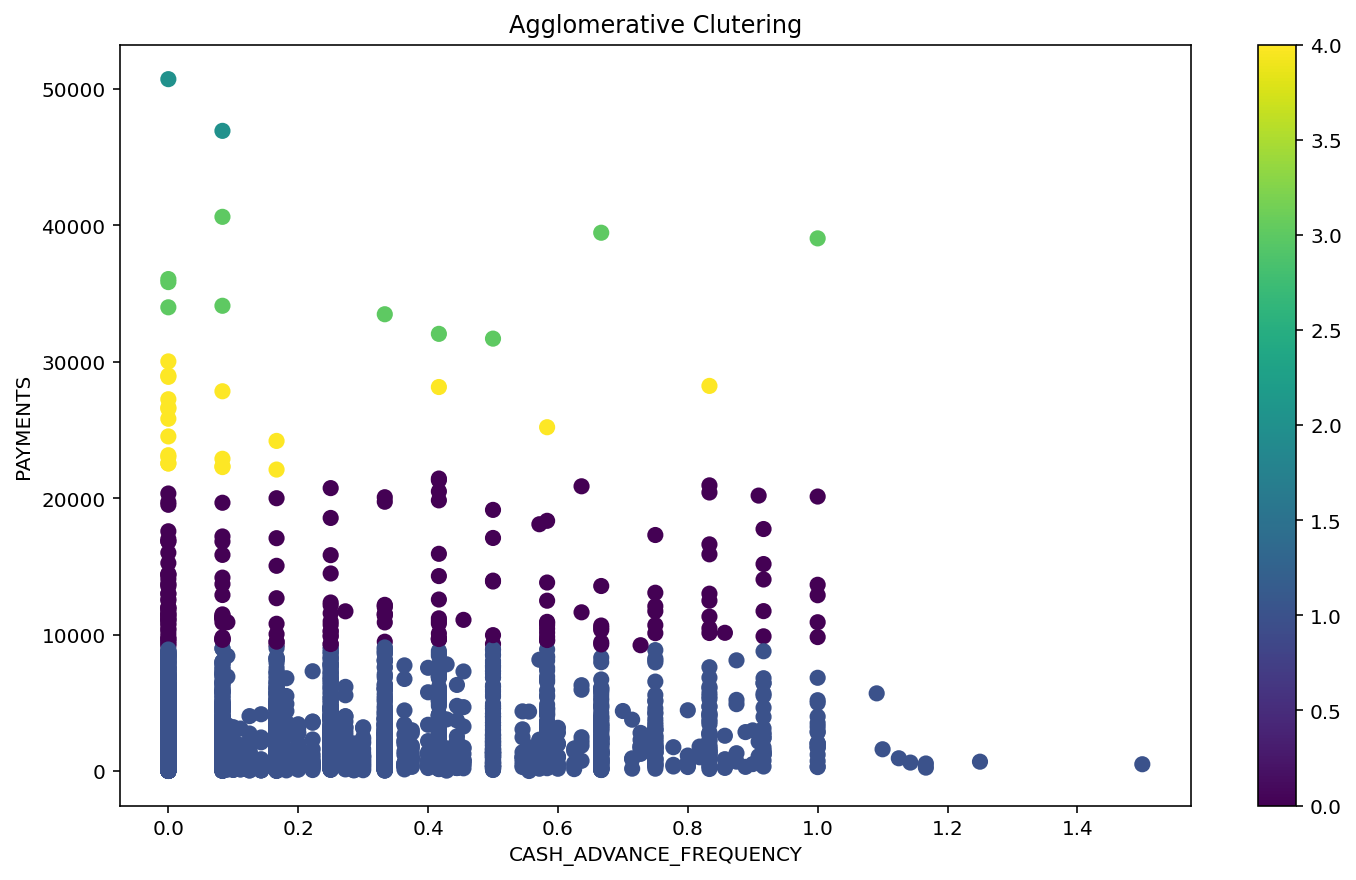

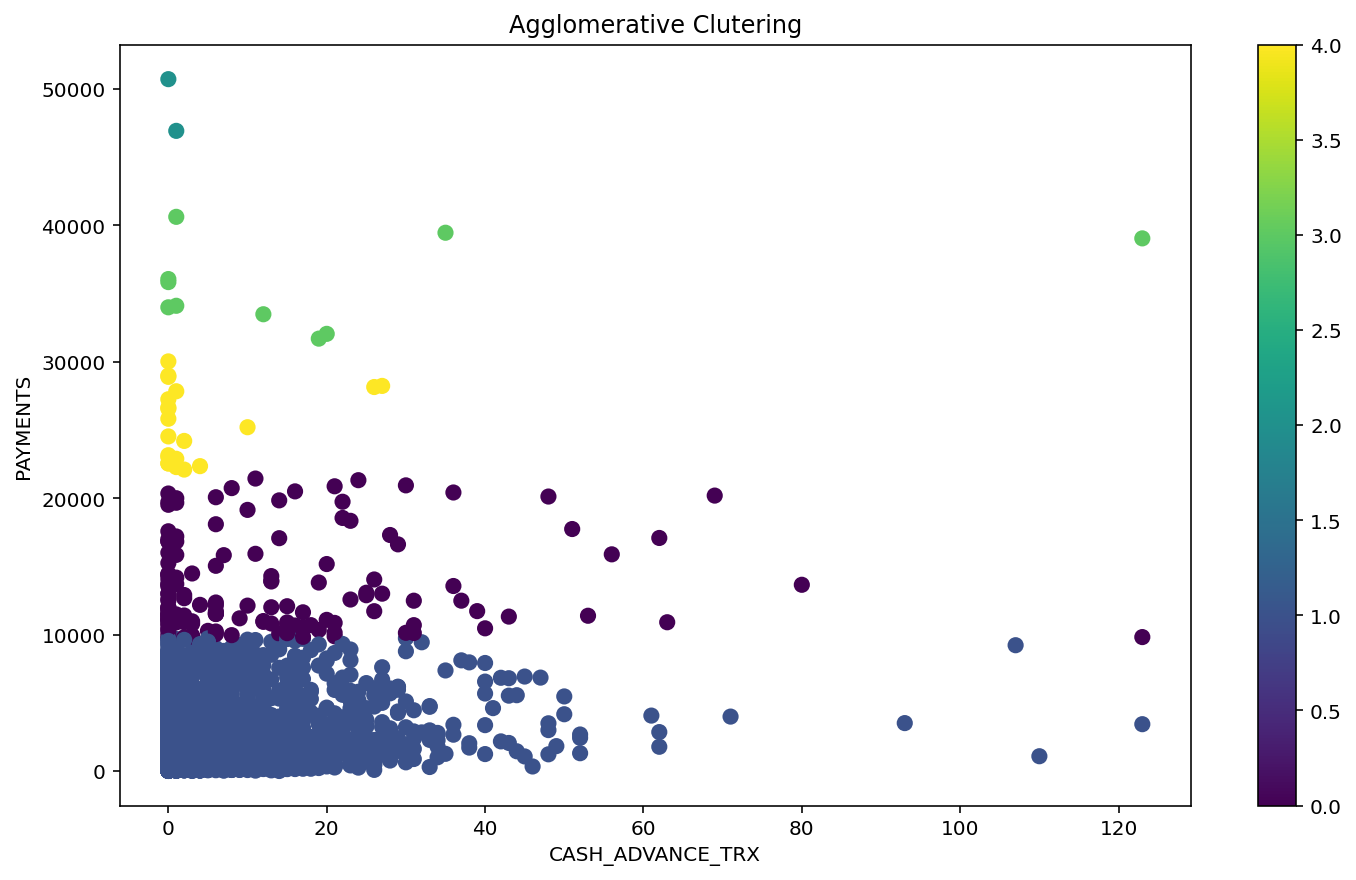

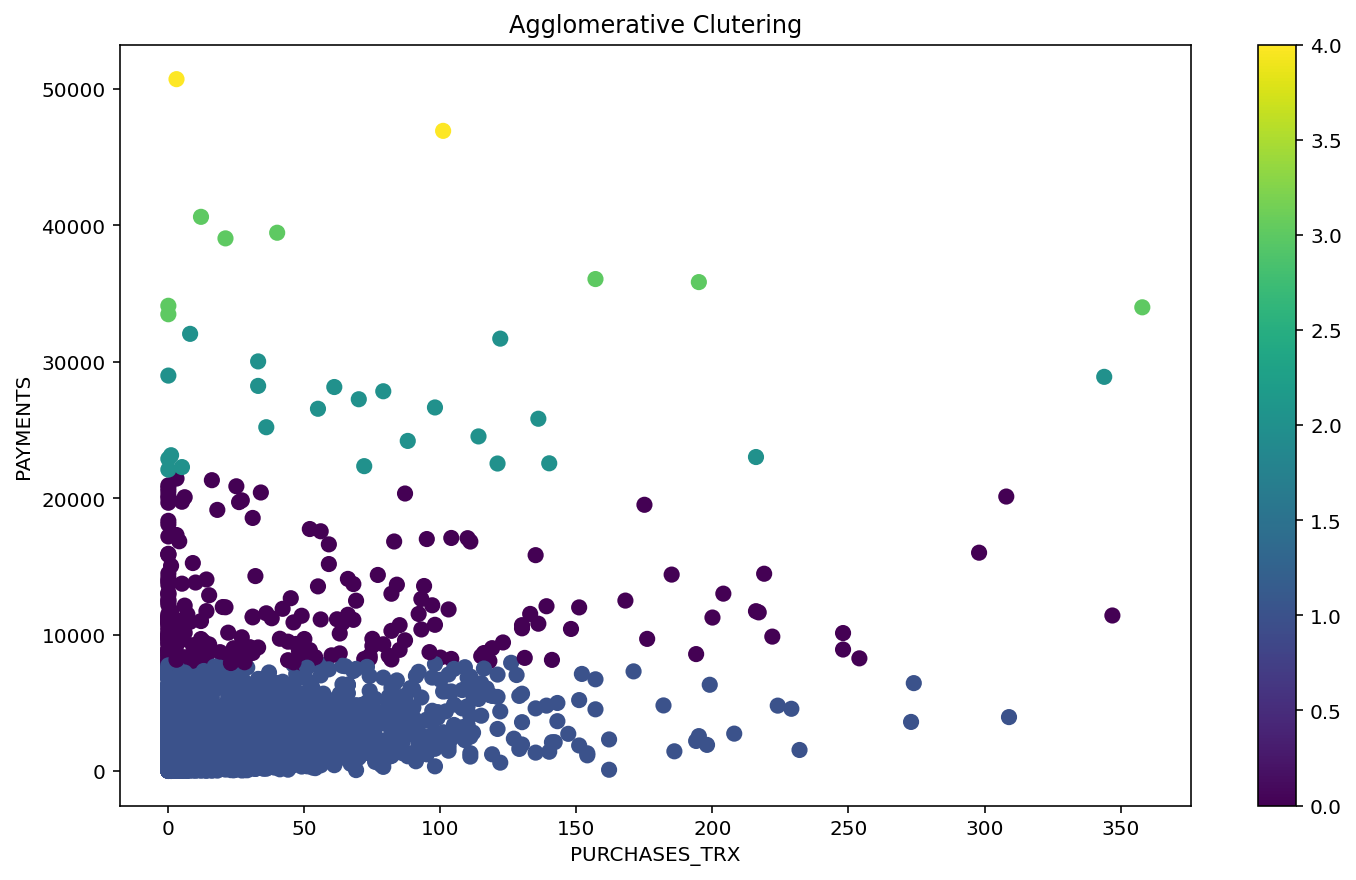

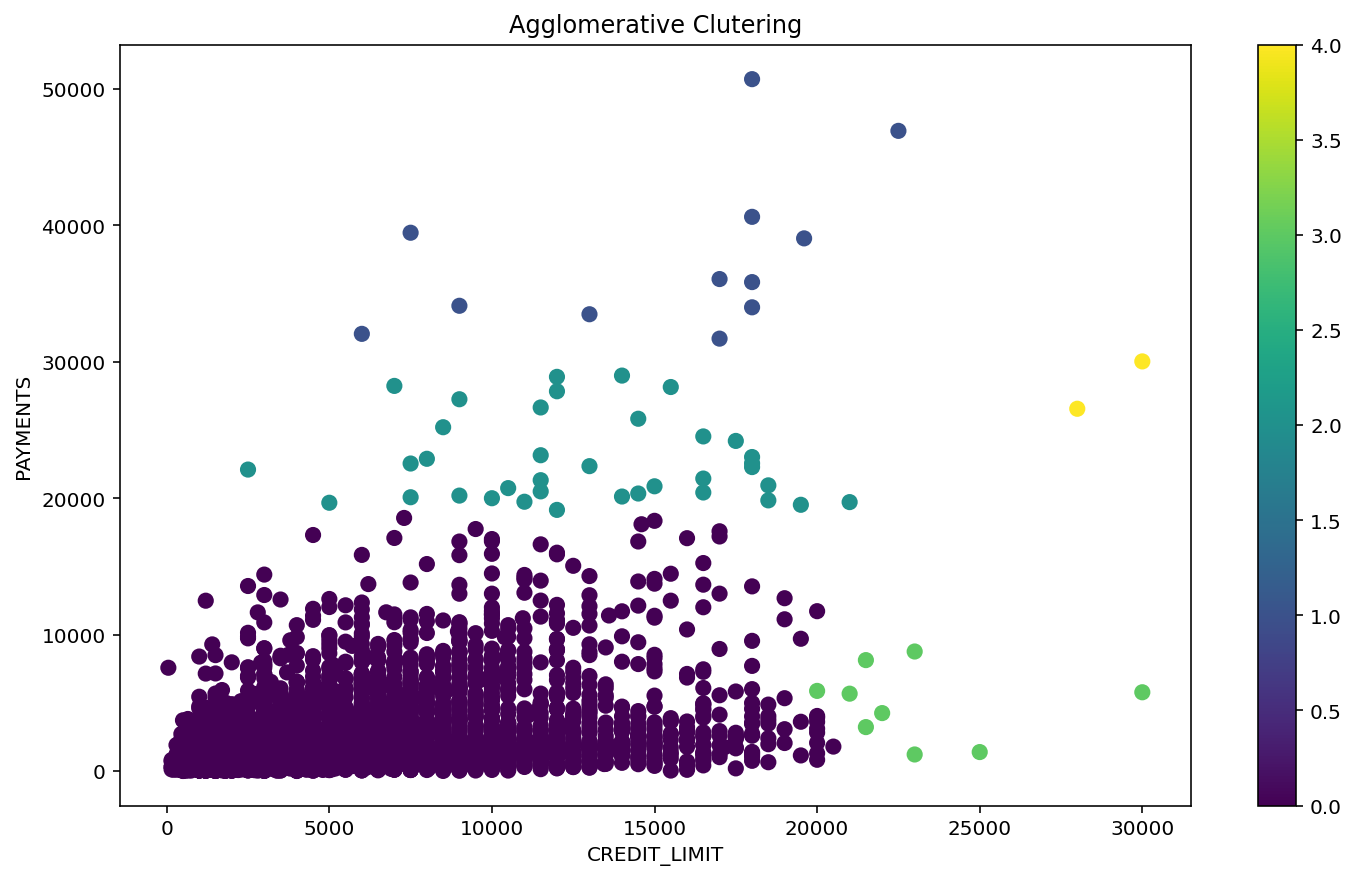

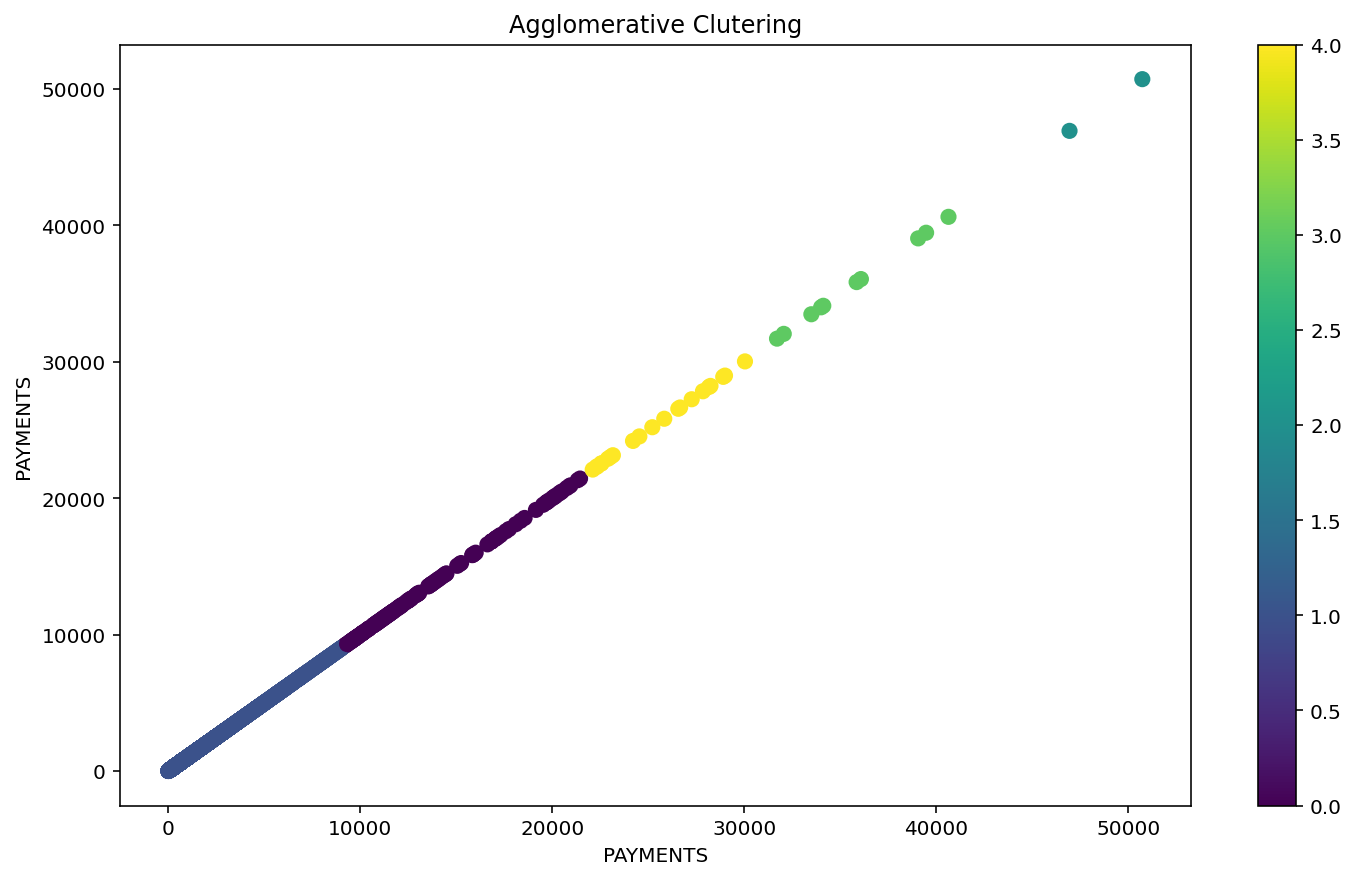

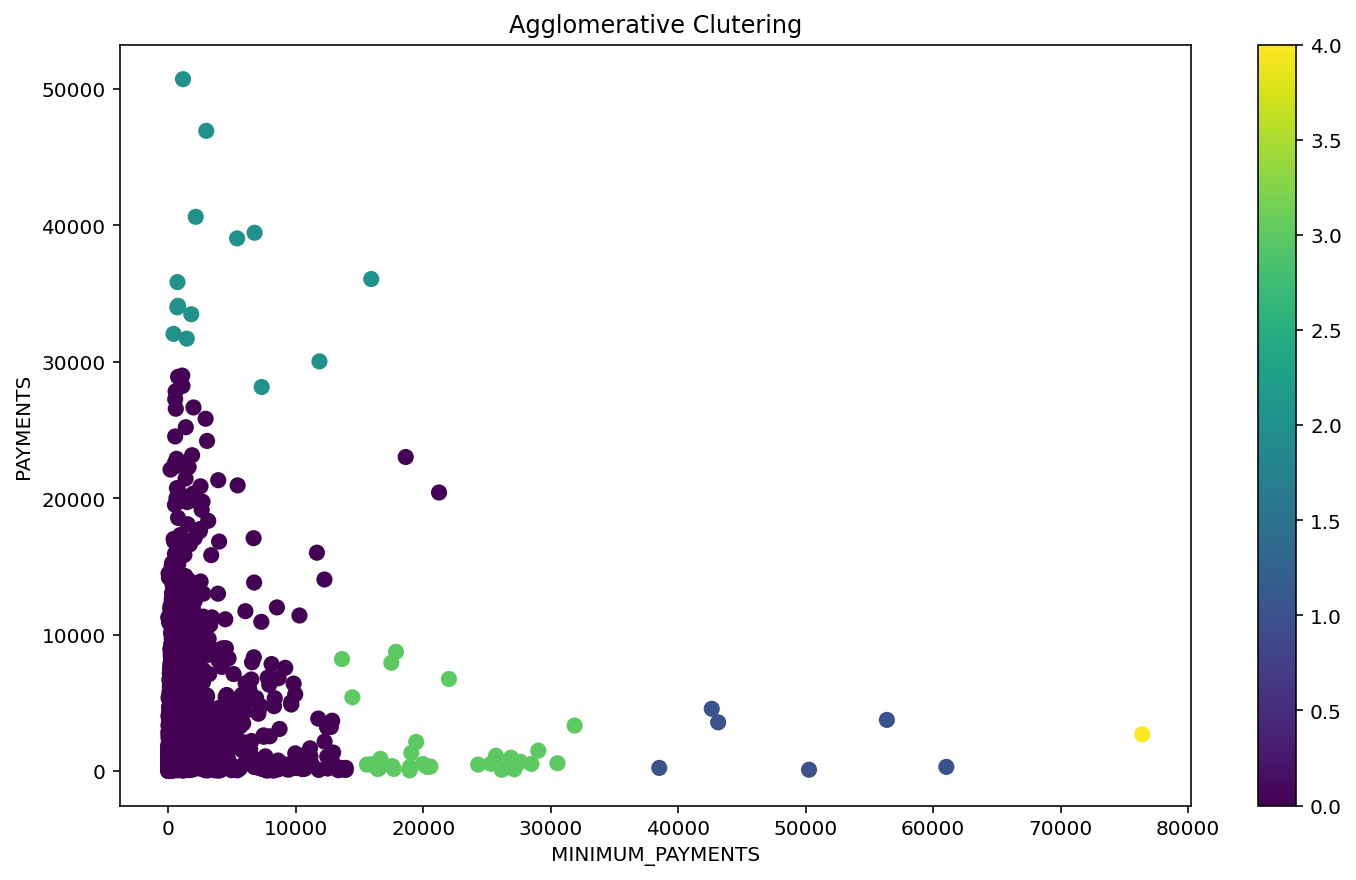

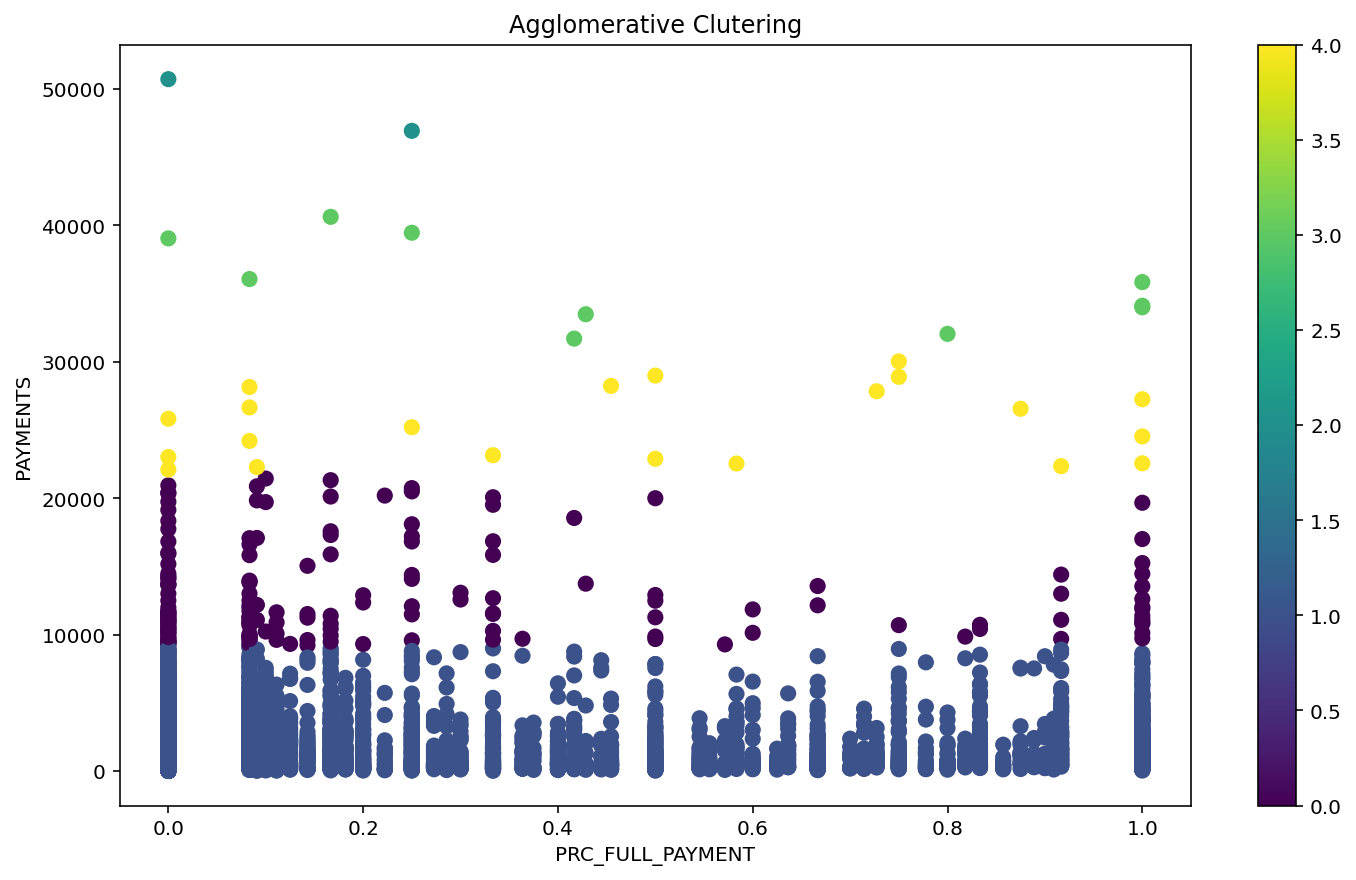

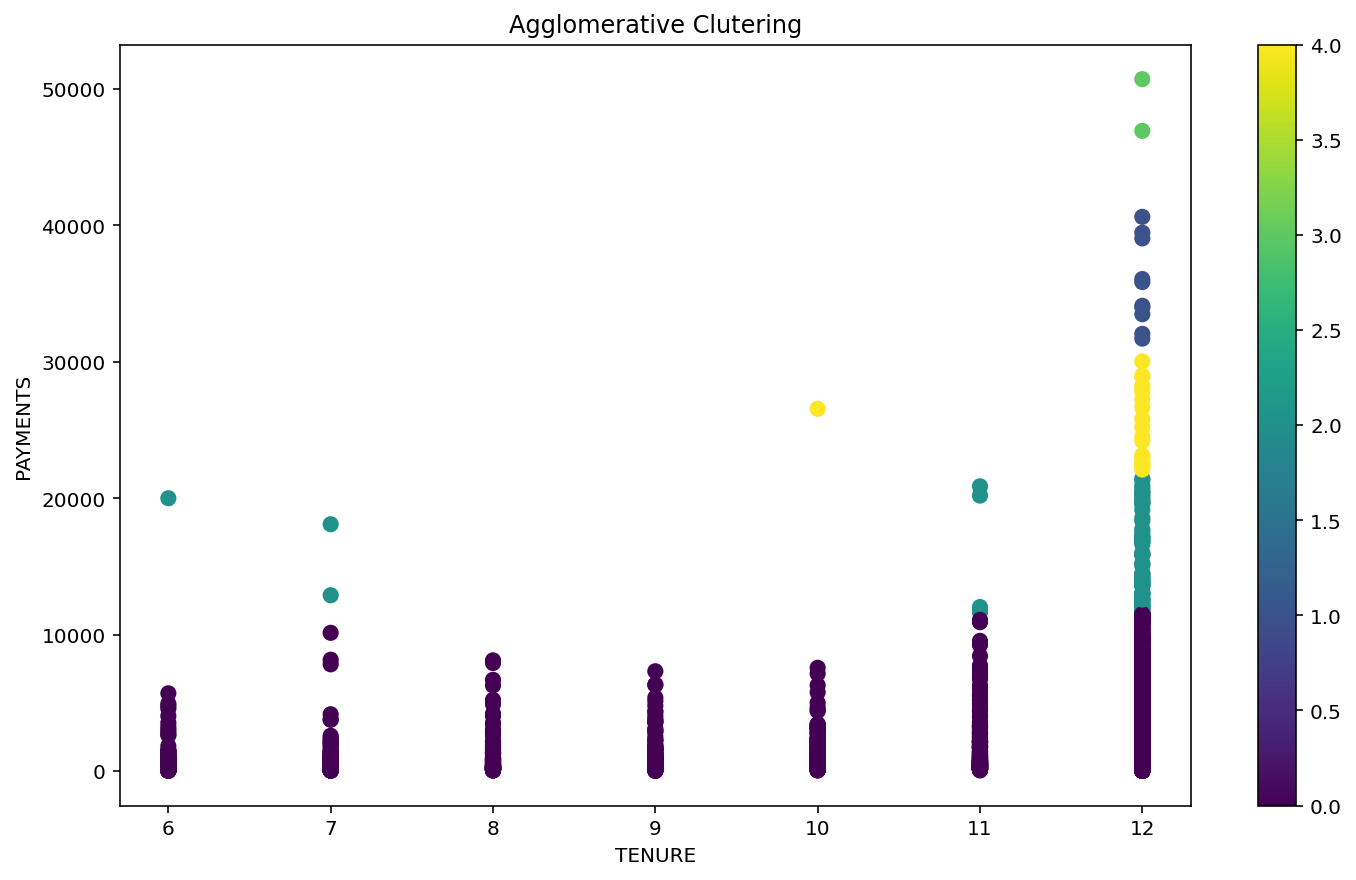

In [6]:
from sklearn.cluster import AgglomerativeClustering 
import matplotlib.pyplot as plt

for idx,column in enumerate(data.columns):
    data=data
    df=data.iloc[:,[idx,13]]
    
    #Importing our clustering algorithm : Agglomerative
    model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
    #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric
    clust_labels=model.fit_predict(df)  
    #After we finished creating our clusters, we can print each point’s corresponding cluster
    agglomerative=pd.DataFrame(clust_labels)
    agglomerative
    
    cols = df.columns 
    
    
    fig =plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter (df.iloc[:,0], df.iloc[:,1] , c= agglomerative[0], s=50)
    ax.set_title("Agglomerative Clutering")
    ax.set_xlabel(cols[0])
    ax.set_ylabel(cols[1])
    plt.colorbar(scatter)

Exercice:4. Plot the dendrogram. Use k-means clustering. 



We will withhold payment and purchase. this will allow us to identify clusters with different behavior and distinct consumption habits.

In [24]:
df=data.iloc[:,[2,13]]

#Dendrogram:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")

dend=shc.dendrogram(shc.linkage(df, method="complete"))

Error in callback <function flush_figures at 0x7f63651a01e0> (for post_execute):


KeyboardInterrupt: 

Use k-means clustering

In [9]:
#K-means fitting
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(df)

KMeans(n_clusters=5, random_state=0)

In [10]:
#k_means label
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,1
1,4
2,1
3,1
4,1
...,...
8631,1
8632,1
8633,1
8634,1


In [11]:
#K-means Centroids

kmeans.predict(df)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[ 7656.35691697  7847.4880531 ]
 [  857.43812605   525.80659244]
 [28574.47495522 27574.3973913 ]
 [18918.80326941  1568.58632353]
 [ 4247.4947422   1974.30039764]]


Exercice 5. Try different k values and select the best one.

In [12]:
#The Elbow method

SOSD=[]
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(df)
    SOSD.append(km.inertia_)
    
print(SOSD)

[113665542587.60948, 63761099078.15254, 41887626069.13771, 31573250397.67865, 25471212948.862976, 19937464865.157303, 16279099304.968649, 14006189252.608881, 12513880548.161924]


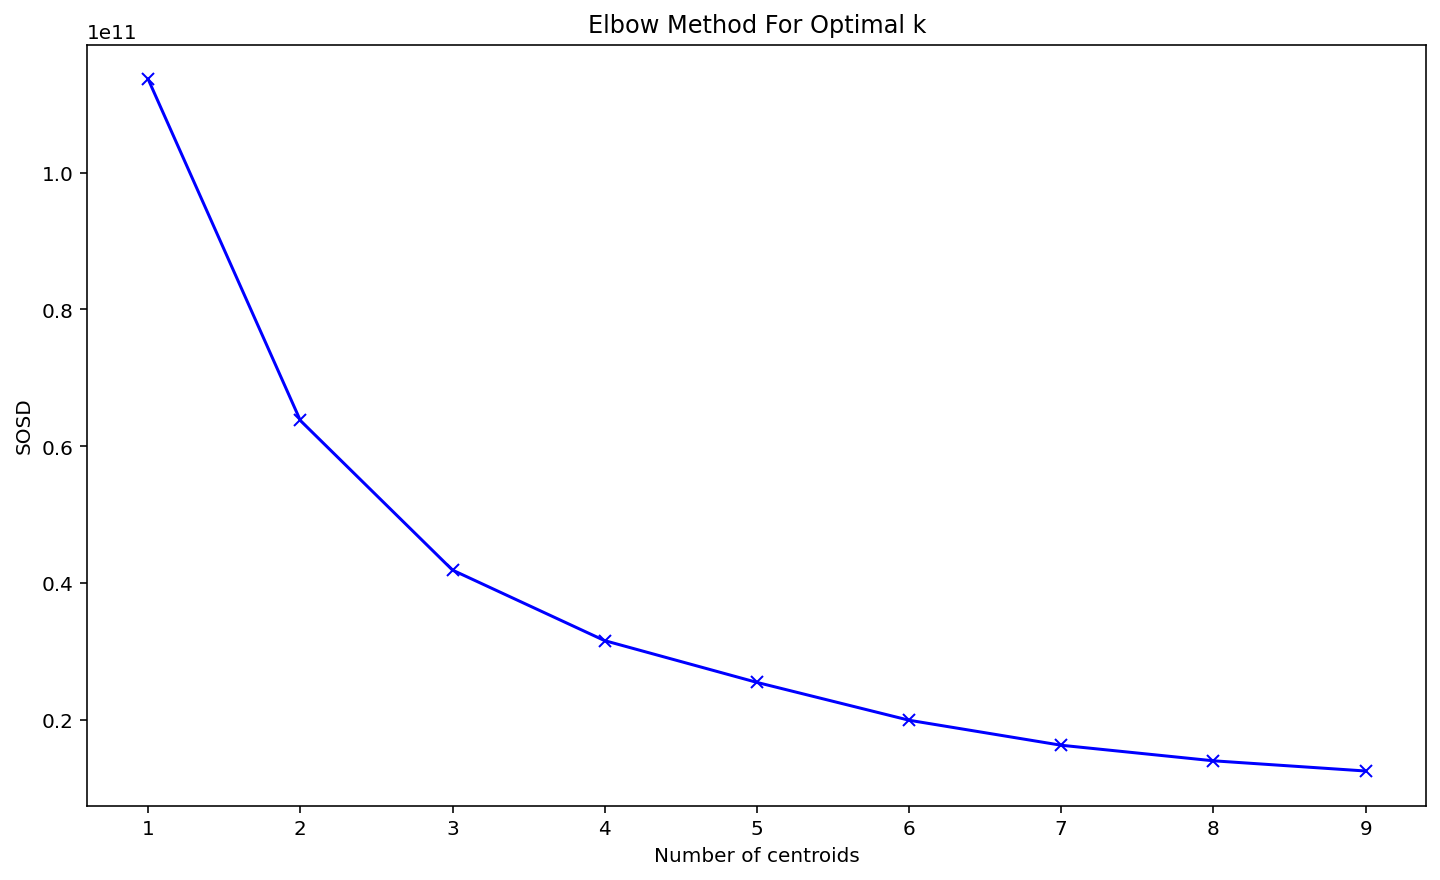

In [13]:
plt.plot(K, SOSD, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('SOSD')
plt.title('Elbow Method For Optimal k')
plt.show()

The elbow is located at K = 6

Exercice 6. Plot the clusters

In [22]:
#K-means fitting with ncluster=4
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=6, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

Text(0, 0.5, 'Payment')

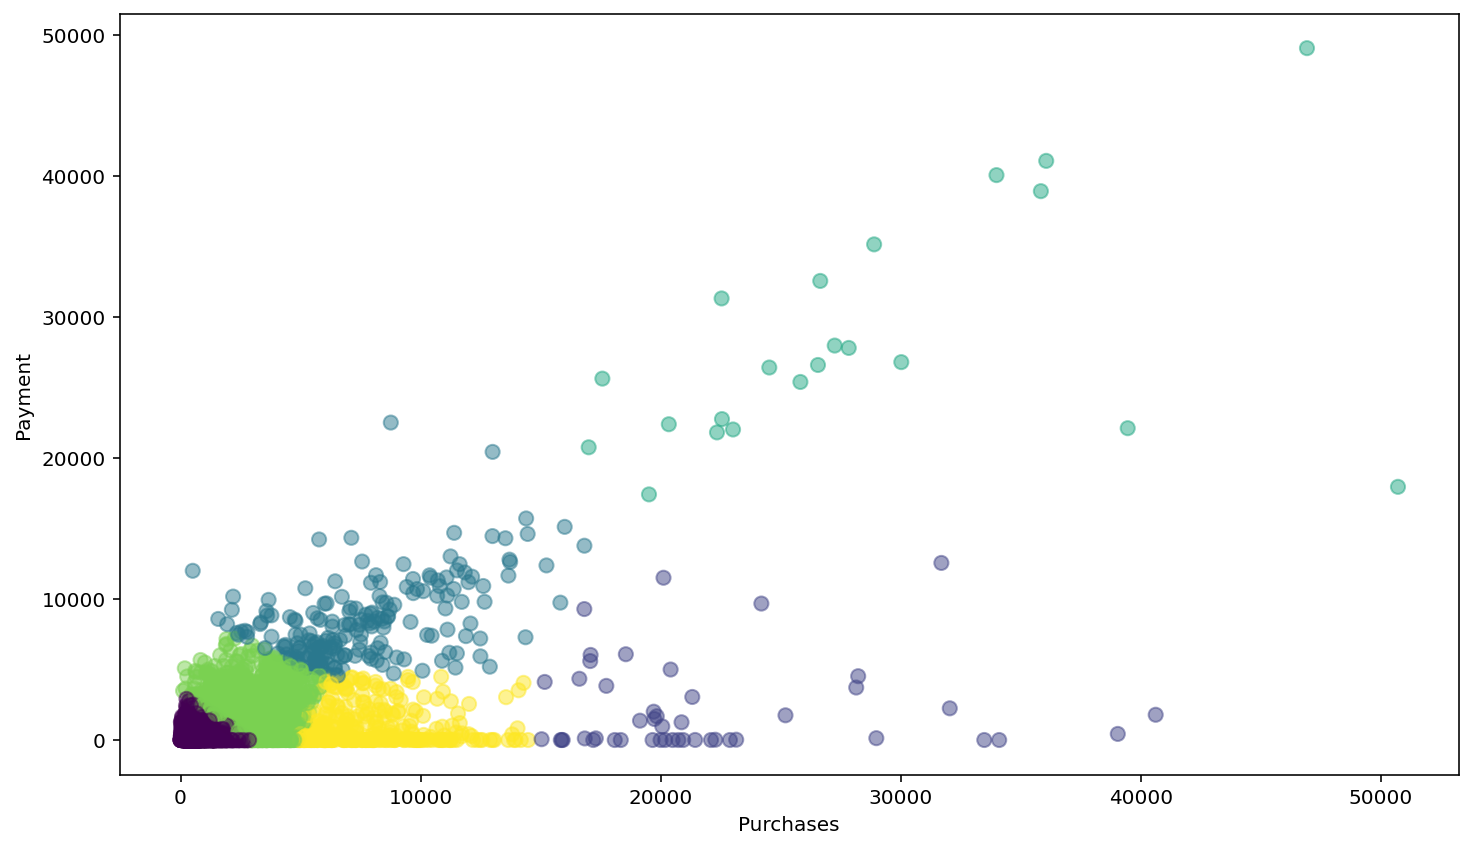

In [23]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.xlabel('Purchases')
plt.ylabel('Payment')

Exercice3. Plot the clusters. 

Exercice 7. Compare the two results. 

The K method means: allowed us to verify 4 distinct groups which seem to be homogeneous:
  1) dark blues: Those who spend little and therefore spend little on their card.
2) The greens: those who request their cards as much as their accounts: they are good credit card users but with limited budget
3) yellow: those who buy moderately but use their credit cards very little.
4) in blue: those who buy little but pay moderately with their credit card.
5) purple: Those who buy a lot but rarely use their credit cards
6) in light blue: those who buy a lot and use their credit cards a lot.

This Clustring is very interesting. it allows to identify the consumption and payment habits of customers. therefore opens the way for the marketing team to offer targeted packages. and also identify the risks associated with each category.